In [10]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df_entire = pd.read_csv('entire_dataset_spat_joined.csv')

/var/folders/n6/mp6mw7cj3h35gsgqcgr72sbw0000gn/T/ipykernel_78021/1286449066.py:1: DtypeWarning: Columns (16,18,20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_entire = pd.read_csv('entire_dataset_spat_joined.csv')


In [34]:
df_entire.head()

,Unnamed: 0.1,Unnamed: 0,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,...,White,African_American,American_Indian,Asian,Native Hawaiian,Other_race,Two_or_more_races,Two_or_more_including_other,Two_or_more_excluding_other,Median_household_income
0,0,0,101001979518,2017-01-01 00:33:05,2017-01-04 08:30:00,2017-01-02 23:48:15,ONTIME,Closed,Case Closed. Closed date : 2017-01-02 23:48:15...,Parking Enforcement,...,3621.0,39.0,0.0,74.0,0.0,47.0,17.0,10.0,7.0,103895.0
1,1,1,101001979520,2017-01-01 01:22:52,2017-01-04 08:30:00,2017-01-02 23:52:13,ONTIME,Closed,Case Closed. Closed date : 2017-01-02 23:52:13...,Parking Enforcement,...,4406.0,426.0,21.0,335.0,0.0,273.0,50.0,0.0,50.0,102277.0
2,2,2,101001979521,2017-01-01 01:24:00,2017-01-18 08:30:00,2017-01-05 15:10:54,ONTIME,Closed,Case Closed. Closed date : 2017-01-05 15:10:54...,PRINTED : Street light out RT,...,5042.0,707.0,0.0,273.0,0.0,445.0,146.0,41.0,105.0,77462.0
3,3,5,101001979525,2017-01-01 02:33:00,NaN,2017-01-06 16:30:54,ONTIME,Closed,Case Closed. Closed date : 2017-01-06 16:30:54...,Schedule a Bulk Item Pickup,...,3393.0,1651.0,0.0,528.0,0.0,726.0,259.0,24.0,235.0,64116.0
4,4,6,101001979526,2017-01-01 03:09:00,2017-01-02 03:09:50,2017-01-02 08:12:44,OVERDUE,Closed,Case Closed. Closed date : 2017-01-02 08:12:44...,Traffic Signal Inspection,...,4406.0,426.0,21.0,335.0,0.0,273.0,50.0,0.0,50.0,102277.0


In [36]:
df_entire.iloc[0, 3]

'2017-01-01 00:33:05'

In [79]:
import math 
df_entire['Tract'].head()
df_7 = df_entire[(df_entire['city_council_district']=='7' )]
df_7['year_open'] = df_7['open_dt'].apply(lambda x: int(x.split('-')[0]))
df_7.columns
def calcTime(start, end):
    try:
        date_format_str = '%Y-%m-%d %H:%M:%S'
        start = datetime.strptime(start, date_format_str)
        end =   datetime.strptime(end, date_format_str)
        diff = end-start
        diff_in_hours = diff.total_seconds() / 3600
        return diff_in_hours
    except:
        return np.NaN

for i in range(df_7.shape[0]):
    x =  calcTime(df_7.iloc[i, 3], df_7.iloc[i, 5])
    print(x)
    df_7.loc[i, 'open_time']=x



/var/folders/n6/mp6mw7cj3h35gsgqcgr72sbw0000gn/T/ipykernel_78021/2244892396.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/n6/mp6mw7cj3h35gsgqcgr72sbw0000gn/T/ipykernel_78021/2244892396.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



197.7513888888889
nan
nan
28.081666666666667
27.836111111111112
20.004444444444445
2714.7494444444446
41.35194444444444
4298.293055555556
19.363333333333333
41.31638888888889
43.141666666666666
15.875833333333333
7.373055555555555
14.023055555555555
25.661944444444444
28.906944444444445
25.8175
29.094722222222224
88.29333333333334
29.950277777777778
1.4922222222222221
nan
1.2502777777777778
1.396111111111111
1.1094444444444445
79.40027777777777
2879.0091666666667
79.20222222222222
48.05083333333334
76.72638888888889
21.7125
9.562222222222223
nan
nan
17.11611111111111
17.136111111111113
0.21472222222222223
19.157222222222224
41.574444444444445
72.26916666666666
1.1044444444444443
nan
14.918055555555556
4.884444444444444
14.342222222222222
594.6802777777777
2345.3675
11.3425
36.89
39.379444444444445
5.977222222222222
2.8475
3.0805555555555557
394.82444444444445
33.78666666666667
10.385833333333334
1.4775
3.6319444444444446
3.3530555555555557
23.897777777777776
1.496388888888889
2.6772222

3.0102777777777776
50.146388888888886
2.0819444444444444
49.20444444444445
0.3863888888888889
1.6416666666666666
20.595555555555556
13945.219444444445
0.03722222222222222
nan
0.04722222222222222
76.68944444444445
0.0325
0.049444444444444444
237.55666666666667
25.740833333333335
0.4413888888888889
909.7908333333334
356.91333333333336
1003.5758333333333
1.153888888888889
74.05833333333334
3.5594444444444444
7462.045555555555
0.03722222222222222
7462.011944444444
0.0425
1.306111111111111
2.421666666666667
44.56305555555556
16.20638888888889
44.13
nan
15.868055555555555
4889.567222222222
215.92027777777778
1.4766666666666666
303.79333333333335
16.68611111111111
41.045833333333334
nan
14.501944444444444
17.726388888888888
12353.853888888889
42.7925
15.945555555555556
1049.9897222222223
1.1302777777777777
1.1297222222222223
2.1058333333333334
15.378333333333334
24.079166666666666
10.731111111111112
nan
9.128333333333334
4.775
0.47583333333333333
nan
0.6672222222222223
676.1938888888889
0.492

123.8975
1.2269444444444444
0.99
nan
0.4275
nan
122.94833333333334
286.8833333333333
122.44888888888889
121.99944444444445
18.0
19.954444444444444
20.188055555555554
6672.113055555556
211.23333333333332
nan
nan
140.01444444444445
nan
16.48361111111111
16.11861111111111
25.700555555555557
4.226111111111111
33.163333333333334
4.1627777777777775
280.26722222222224
nan
nan
0.5305555555555556
0.2577777777777778
9.245555555555555
0.0375
6.6497222222222225
1.2355555555555555
97.16
18435.623333333333
18435.513333333332
152.61583333333334
0.4841666666666667
3.7711111111111113
nan
7057.246944444444
1442.0519444444444
1799.8680555555557
4.3
2615.0925
1.05
2.887777777777778
31.762777777777778
0.8583333333333333
1.6063888888888889
27.63361111111111
3.1508333333333334
119.50305555555556
2.1083333333333334
0.2866666666666667
0.5411111111111111
0.4305555555555556
1.101388888888889
142.0263888888889
29.81361111111111
2.4930555555555554
0.0008333333333333334
0.0005555555555555556
0.0005555555555555556
3

6.2908333333333335
2.165277777777778
2.0677777777777777
100.51194444444444
2.3494444444444444
0.0019444444444444444
168.65944444444443
94.94805555555556
18266.179722222223
3.798611111111111
0.12444444444444444
0.9511111111111111
101.97611111111111
1.4555555555555555
3.4525
838.0405555555556
nan
0.0005555555555555556
0.0005555555555555556
0.36083333333333334
24.573888888888888
6.01
4201.400555555556
6573.299444444445
101.37555555555555
25.365833333333335
0.7341666666666666
0.0005555555555555556
0.011944444444444445
20.326666666666668
1.9769444444444444
2115.1847222222223
99.89305555555555
1.3394444444444444
nan
94.73638888888888
549.2013888888889
4.0225
477.98333333333335
0.12416666666666666
139.88222222222223
18.13361111111111
1365.951388888889
2.354722222222222
186.7422222222222
11.26361111111111
2.0641666666666665
145.815
92.6661111111111
121.73694444444445
70.45333333333333
5.7925
18.16111111111111
929.2641666666667
2036.0775
14.588333333333333
2.2758333333333334
15.202777777777778


nan
96.83111111111111
76.96027777777778
0.93
0.105
nan
nan
5.222777777777778
1.01
22.384444444444444
47.94138888888889
4.423055555555556
1.0497222222222222
43.92583333333334
593.8561111111111
19.145833333333332
43.221666666666664
nan
6379.829444444445
41.66777777777778
nan
0.5669444444444445
11.189722222222223
4.4880555555555555
1044.3091666666667
nan
0.07805555555555556
324.5258333333333
24.035
24.505277777777778
25.489722222222223
32.59916666666667
96.46222222222222
96.43861111111111
24.65
23.51861111111111
15.556666666666667
457.0077777777778
1.5180555555555555
12.745555555555555
22.67527777777778
12.663611111111111
12.381944444444445
1.7630555555555556
14.162222222222223
0.6780555555555555
98.12944444444445
nan
nan
nan
6.818611111111111
6.591944444444445
1.405
2468.5355555555557
10.575277777777778
10.537222222222223
10.516944444444444
95.39666666666666
45.47027777777778
18.268333333333334
0.15138888888888888
6.678333333333334
5.303333333333334
11.757777777777777
11.657777777777778


109.28444444444445
7.3133333333333335
90.46555555555555
7.0072222222222225
6.914444444444444
30.61777777777778
68.47027777777778
50.725
29.343333333333334
12.950277777777778
11.022222222222222
0.7588888888888888
13.162777777777778
153.76527777777778
3.8222222222222224
11.258888888888889
61.2825
55.75138888888889
1.3291666666666666
6.756944444444445
60.547777777777775
4.039722222222222
1.4097222222222223
0.7355555555555555
56.76361111111111
3.5252777777777777
1.8752777777777778
nan
1.7361111111111112
76.90416666666667
46.84166666666667
18.895
46.56055555555555
46.58277777777778
46.51277777777778
46.5175
51.306666666666665
0.845
45.65694444444444
0.49027777777777776
57.6875
75.05722222222222
45.67722222222222
0.14277777777777778
68.68583333333333
57.26583333333333
0.29
57.065
1.3811111111111112
12.095833333333333
45.246944444444445
49.54944444444445
0.8969444444444444
43.146388888888886
16.25027777777778
3.7883333333333336
13.98638888888889
23.424166666666668
0.21861111111111112
14.11111

nan
nan
1321.1752777777779
3.277222222222222
0.024444444444444446
48.68083333333333
11046.101666666667
3.2266666666666666
14.780555555555555
0.013055555555555556
14.911666666666667
213.93666666666667
0.31555555555555553
2.1441666666666666
14.685
2.7930555555555556
0.3036111111111111
2.5808333333333335
29.801111111111112
14.259444444444444
0.1613888888888889
48.98
273.2727777777778
44.734722222222224
0.1836111111111111
44.569722222222225
44.48027777777778
2.296388888888889
11.228055555555555
0.03777777777777778
1.8972222222222221
nan
2.3755555555555556
25.42
21.413333333333334
13.819444444444445
1.8919444444444444
2.8136111111111113
2.838611111111111
35.14694444444444
145.59222222222223
1008.1336111111111
1.0147222222222223
46.12111111111111
nan
nan
52.74527777777778
10.519722222222223
23.785833333333333
1.1030555555555555
23.499166666666667
0.8963888888888889
86.00194444444445
24.357222222222223
11.751944444444444
12.871666666666666
10.588333333333333
144.85888888888888
nan
12.60166666

37.327222222222225
36.80027777777778
37.3175
44.299166666666665
43.25388888888889
20.10611111111111
5.530833333333334
6072.7475
10.542222222222222
nan
97.12666666666667
36.708333333333336
47.410555555555554
nan
21.196944444444444
21.188333333333333
20.93027777777778
4.660277777777778
1543.1955555555555
4313.636666666666
nan
20.406944444444445
nan
43.01916666666666
nan
nan
43.01027777777778
19.2825
36.89861111111111
nan
89.89916666666667
37.26777777777778
64.8775
0.020833333333333332
14.773055555555555
94.51611111111112
31.240833333333335
13.3525
28.97138888888889
37.74333333333333
29.701944444444443
13169.441111111111
nan
0.7113888888888888
6100.660555555555
196.63444444444445
nan
122.30972222222222
29.094166666666666
1.5666666666666667
49.48083333333334
80.75
337.15472222222223
26.200555555555557
47.36055555555556
nan
73.68555555555555
45.97222222222222
2763.202222222222
45.37611111111111
71.83583333333333
29.364166666666666
nan
22.74
45.1875
nan
239.67305555555555
5.655555555555556
0

14.522222222222222
95.2311111111111
6041.2025
14.171666666666667
17.337222222222223
13.743611111111111
1.6358333333333333
2008.3277777777778
141.675
85.29611111111112
67.01611111111112
0.2902777777777778
441.9194444444444
0.7761111111111111
0.014166666666666666
0.01
88.6288888888889
9.653611111111111
6.456666666666667
5.405833333333334
3504.7527777777777
0.13277777777777777
54.0075
53.98305555555555
53.992222222222225
52.48111111111111
0.6608333333333334
123.11694444444444
109.26083333333334
7.253888888888889
94.81666666666666
22.931944444444444
47.26777777777778
22.064166666666665
23.400277777777777
0.20333333333333334
93.40277777777777
1.5372222222222223
21.844722222222224
0.45611111111111113
0.8844444444444445
49.565555555555555
nan
811.3872222222222
68.10972222222222
69.5513888888889
26.813333333333333
0.15833333333333333
0.008888888888888889
18.60472222222222
6115.764444444444
2779.5583333333334
47.84388888888889
115.88361111111111
91.08361111111111
0.26611111111111113
20.785
0.19

0.7258333333333333
0.77
30.51222222222222
313.11555555555555
66.43472222222222
67.55444444444444
18.148888888888887
63.105
92.10305555555556
2.593611111111111
313.50388888888887
120.98777777777778
92.09
62.34
62.28138888888889
40.868611111111115
40.50055555555556
40.37833333333333
112.59083333333334
8.206666666666667
4.956111111111111
22.031944444444445
10638.871111111112
893.6052777777778
143.7575
3576.195
nan
47.236666666666665
0.8483333333333334
73.88027777777778
745.2322222222223
145.0013888888889
2615.2927777777777
nan
477.7183333333333
2.551388888888889
2.4347222222222222
1.8647222222222222
138.65805555555556
20.235555555555557
nan
19.805833333333332
nan
41.83888888888889
32.32555555555555
nan
11128.31138888889
1823.3219444444444
11128.436944444444
7.0175
1.6202777777777777
1628.4308333333333
0.4483333333333333
0.14055555555555554
0.0002777777777777778
0.7019444444444445
nan
1.0519444444444443
nan
26.148055555555555
22.58111111111111
5991.986666666667
12.632222222222222
23.778611

3.4230555555555555
21.60333333333333
4868.434722222222
1.543611111111111
67.47611111111111
0.025555555555555557
575.4769444444445
19.203055555555554
nan
2.564722222222222
16.43111111111111
3.223333333333333
50.520833333333336
234.6236111111111
nan
17.350833333333334
2.549166666666667
382.4847222222222
0.010277777777777778
2.0016666666666665
1724.1372222222221
nan
64.66055555555556
47.58083333333333
1390.0916666666667
69.82444444444444
1.341388888888889
521.4330555555556
0.7036111111111111
41.871944444444445
48.3825
nan
0.7652777777777777
64.2075
nan
16.353055555555557
nan
88.69416666666666
nan
11.719166666666666
2559.406388888889
12.985833333333334
12.642777777777777
12.324444444444444
10.754722222222222
0.6733333333333333
12.226111111111111
16.641111111111112
0.10611111111111111
8.755833333333333
9.015833333333333
11.052222222222222
1.2241666666666666
4.715833333333333
4.624444444444444
29.405555555555555
54.95611111111111
2.018611111111111
50.81527777777778
118.65305555555555
3.65305

606.8641666666666
51.98888888888889
3.9180555555555556
1319.6930555555555
78.97694444444444
44.43555555555555
434.1433333333333
71.94888888888889
44.75111111111111
773.8727777777777
1.9594444444444445
244.81972222222223
nan
82.33805555555556
71.21055555555556
71.14444444444445
2.3805555555555555
0.385
2.0775
0.2861111111111111
482.9513888888889
96.29833333333333
2.1730555555555555
5.567777777777778
5.595
146.00416666666666
46.71138888888889
3.811111111111111
574.3047222222223
47.98694444444445
77.51861111111111
1.2472222222222222
74.62055555555555
97.11361111111111
121.94888888888889
47.6375
2.3730555555555557
0.8677777777777778
0.41555555555555557
1.2575
572.4088888888889
310.90972222222223
118.46083333333333
66.40222222222222
43.13
7.102777777777778
65.36333333333333
72.12555555555555
66.9725
66.29861111111111
89.65055555555556
100.26194444444444
45.904444444444444
69.38
0.08916666666666667
76.55027777777778
65.4888888888889
69.62861111111111
457.0211111111111
45.315555555555555
42.9

0.66
507.8888888888889
139.2625
1.8552777777777778
22.206666666666667
0.6052777777777778
97.16527777777777
1321.3744444444444
95.78861111111111
190.79333333333332
4.090277777777778
2883.563611111111
1.8611111111111112
16.91
141.2675
141.09
259.8986111111111
141.01305555555555
140.98527777777778
1.1102777777777777
0.3686111111111111
0.6922222222222222
0.3422222222222222
16.595555555555556
1.3930555555555555
284.4825
86.35916666666667
nan
23.33361111111111
0.08083333333333333
483.6213888888889
308.3827777777778
1.0033333333333334
0.4891666666666667
1.2908333333333333
13.27
14756.78
nan
978.3166666666667
0.6075
11.786944444444444
0.7577777777777778
75.88694444444444
28.471666666666668
2.763333333333333
70.82222222222222
4.070277777777778
nan
2.0530555555555554
1.1130555555555555
1.8780555555555556
152.2263888888889
74.58
3962.9283333333333
0.26916666666666667
73.69277777777778
4.5936111111111115
103.13222222222223
1.7938888888888889
789.1813888888889
0.7927777777777778
94.76916666666666
0

120.47972222222222
619.8111111111111
114.33222222222223
6209.936111111111
3.9580555555555557
0.006388888888888889
0.7208333333333333
121.96972222222222
599.3936111111111
15.943333333333333
14.44361111111111
15.845
119.16972222222222
0.005833333333333334
0.7363888888888889
0.004722222222222222
2.3394444444444447
168.36194444444445
114.69361111111111
13.894722222222223
1863.3761111111112
14.35361111111111
90.41
938.45
16.165
nan
12.714444444444444
15.069722222222222
12.867777777777778
1.0533333333333332
1.4394444444444445
13.391666666666667
2828.3825
11.63888888888889
454.83805555555557
768.1488888888889
29.113333333333333
0.8927777777777778
2311.4222222222224
247.8875
5.050277777777778
2.7683333333333335
nan
0.0022222222222222222
3.220833333333333
1.28
942.3911111111111
3.425
1.1111111111111112
342.4347222222222
100.58916666666667
nan
75.89166666666667
nan
1.4977777777777779
342.22777777777776
0.3447222222222222
581.6441666666667
3.368888888888889
120.90333333333334
2.128888888888889
na

0.8358333333333333
3.026666666666667
2.9155555555555557
0.5594444444444444
2.763333333333333
4.460833333333333
4.831944444444445
2.495
1.5986111111111112
0.9608333333333333
0.9797222222222223
nan
6.874722222222222
2470.3983333333335
0.27111111111111114
823.3930555555555
0.7013888888888888
4.740277777777778
4.736111111111111
0.6416666666666667
8353.55361111111
103.31805555555556
5.638333333333334
0.7891666666666667
433.0786111111111
433.0566666666667
75.80277777777778
0.5855555555555556
nan
2.3833333333333333
1.3972222222222221
1.3608333333333333
0.0
nan
0.09166666666666666
0.5272222222222223
0.0
0.47194444444444444
73.9675
77.38083333333333
77.31472222222222
5.683888888888889
nan
645.1272222222223
1.3605555555555555
1.45
1.1397222222222223
48.336666666666666
121.59555555555555
3.0644444444444443
95.27833333333334
161.88222222222223
47.41027777777778
1.0355555555555556
819.0680555555556
0.2311111111111111
793.805
4.634722222222222
1.458888888888889
4.166666666666667
0.7755555555555556
9

1487.1755555555555
142.63444444444445
nan
20.23111111111111
2.3869444444444445
145.58444444444444
2373.188611111111
119.38333333333334
2.077777777777778
4844.791666666667
0.0375
2.6286111111111112
3.727222222222222
122.88472222222222
288.7322222222222
2.7088888888888887
218.12083333333334
5.594444444444444
0.08722222222222223
1368.236111111111
nan
2442.9791666666665
3042.2994444444444
186.12333333333333
479.2702777777778
16.351666666666667
115.6588888888889
0.26861111111111113
19.102777777777778
15.911944444444444
21.47861111111111
4.868055555555555
15.618333333333334
18.430833333333332
3.1141666666666667
184.3475
13.425277777777778
4.047777777777778
14.450277777777778
136.28277777777777
0.4725
14.498055555555556
109.52555555555556
4838.964166666667
18.308333333333334
304.0672222222222
13.60388888888889
13065.152222222223
1121.8538888888888
117.28805555555556
4.547777777777778
nan
293.0833333333333
nan
5.242222222222222
4.091944444444445
1.4744444444444444
98.49833333333333
292.195
0.8

1.2247222222222223
131.14416666666668
1.1372222222222221
1.1033333333333333
0.2872222222222222
0.2611111111111111
0.7613888888888889
14.569444444444445
0.59
14.533611111111112
130.79111111111112
80.72944444444444
609.4583333333334
609.3127777777778
4.362777777777778
nan
nan
315.70222222222225
4.359166666666667
1.2066666666666668
628.5827777777778
0.4880555555555556
2257.5525
3.631666666666667
742.7661111111111
1.3191666666666666
8497.408611111112
2.9047222222222224
2.845
1.515
74.35055555555556
1.861388888888889
1.2647222222222223
5.198888888888889
2.2666666666666666
0.6172222222222222
1.8833333333333333
0.7933333333333333
0.7158333333333333
nan
77.69388888888889
262.4963888888889
98.295
125.10527777777777
71.31777777777778
479.5469444444444
1.2869444444444444
0.5663888888888889
0.21583333333333332
0.5211111111111111
312.0155555555556
93.38916666666667
2.596111111111111
146.0052777777778
66.68666666666667
16.816388888888888
15.569166666666666
4.802222222222222
0.03805555555555556
88.42

103.50861111111111
678.1516666666666
2137.429166666667
0.09527777777777778
3.435277777777778
2138.362777777778
661.0872222222222
103.63805555555555
3365.976111111111
151.62694444444443
nan
1.3558333333333332
0.6897222222222222
0.7516666666666667
0.6305555555555555
0.5733333333333334
0.5113888888888889
nan
6649.449722222223
0.305
1.0341666666666667
0.006388888888888889
0.8322222222222222
0.7422222222222222
47.44111111111111
0.10555555555555556
26.33222222222222
0.24166666666666667
0.005833333333333334
nan
0.35694444444444445
5332.606111111111
1.4647222222222223
1.4552777777777777
0.9925
0.01972222222222222
101.35583333333334
1780.5602777777779
20.651944444444446
1.4394444444444445
93.58166666666666
nan
99.60861111111112
0.02277777777777778
117.37722222222222
91.39055555555555
2.457777777777778
427.5538888888889
1267.8725
nan
20.535555555555554
0.325
113.49583333333334
144.4738888888889
0.5427777777777778
4.275277777777778
97.66055555555556
3.977777777777778
nan
1170.2613888888889
16486.

740.1808333333333
740.1952777777777
1.2844444444444445
3.504166666666667
2037.211388888889
49.81666666666667
1844.5394444444444
7505.9525
14.8425
1.545
49.01722222222222
66.58166666666666
nan
42.88472222222222
19.795555555555556
23.601944444444445
23.79361111111111
23.364166666666666
47.53527777777778
349.8569444444444
0.2313888888888889
0.23805555555555555
15.633888888888889
62.51166666666666
14.970277777777778
13.8575
0.17277777777777778
2227.11
13.270555555555555
12.597777777777777
11.217222222222222
20.2525
12.231111111111112
0.7536111111111111
2731.4513888888887
11.426666666666666
3.2597222222222224
0.3236111111111111
519.3502777777778
8.830833333333333
6.698333333333333
173.11111111111111
2.4516666666666667
0.16722222222222222
33.65416666666667
0.05416666666666667
nan
15.86888888888889
10.979166666666666
0.042777777777777776
32.43861111111111
2.455277777777778
6.746666666666667
10.32638888888889
56.12916666666667
3.056388888888889
176.0247222222222
3.553611111111111
nan
9.9991666

nan
nan
9.391666666666667
2.569722222222222
75.43694444444445
2.0016666666666665
3.7369444444444446
6436.2780555555555
1.6383333333333334
1.5422222222222222
6.9030555555555555
40.71944444444444
2.868611111111111
1.0919444444444444
29.732222222222223
1.585
1.0186111111111111
0.6313888888888889
176.34333333333333
701.5630555555556
0.27416666666666667
175.86055555555555
55.86
0.04972222222222222
nan
3.2908333333333335
1.2505555555555556
4900.928611111111
nan
2.835277777777778
2.803888888888889
0.31722222222222224
2.1438888888888887
2.1572222222222224
55.11055555555556
529.5388888888889
243.11666666666667
5.139166666666667
54.845
nan
1.5541666666666667
2.9175
1.0525
76.855
4084.472222222222
4084.360833333333
4084.2969444444443
4084.255277777778
4084.2383333333332
0.5536111111111112
20.136111111111113
44.58138888888889
25.75111111111111
1.3038888888888889
4.816944444444444
25.469444444444445
0.9922222222222222
0.8997222222222222
333.8702777777778
44.70333333333333
20.183611111111112
73.9477

43.49472222222222
0.9338888888888889
15.321944444444444
12.777222222222223
0.008611111111111111
3.07
572.0708333333333
17.8025
12.380555555555556
16.985277777777778
218.91611111111112
11.474444444444444
37.63055555555555
nan
40.41916666666667
2.762777777777778
0.8272222222222222
0.5466666666666666
13.006944444444445
10.564722222222223
146.8552777777778
1.9219444444444445
541.2147222222222
1.5108333333333333
1.363888888888889
672.5097222222222
3.4325
0.25722222222222224
25.72111111111111
55.606944444444444
nan
3.5625
25.80666666666667
23.483055555555556
2.926388888888889
2.9780555555555557
nan
1230.1261111111112
25.063333333333333
1227.3402777777778
1227.2719444444444
3.3125
1013.8705555555556
8428.573333333334
1227.2975
672.1586111111111
50.99166666666667
1227.268611111111
3.2822222222222224
2.4630555555555556
1.6197222222222223
54.574444444444445
1703.7775
1.3577777777777778
54.14277777777778
1.4013888888888888
54.01
45.529444444444444
nan
53.693888888888885
6.4511111111111115
29.6077

19.511666666666667
784.5366666666666
27.989444444444445
17.446666666666665
7.974166666666667
205.92472222222221
16.040277777777778
20.52611111111111
10.42361111111111
66.07611111111112
94.27111111111111
36.448055555555555
14.601666666666667
5.668888888888889
20.888333333333332
5.158611111111111
4.974722222222222
8.308055555555555
567.7480555555555
44.505833333333335
253.20277777777778
7.1338888888888885
12.983888888888888
12.298333333333334
13.355
11074.119166666667
nan
nan
0.7347222222222223
82.32166666666667
26.1375
0.31166666666666665
30.625833333333333
26.66888888888889
27.61861111111111
8.421944444444444
0.03861111111111111
2.4705555555555554
3798.5027777777777
24.661666666666665
1.8316666666666668
nan
50.89694444444444
79.42194444444445
1.9416666666666667
5.012777777777778
26.282222222222224
5.73
24.413055555555555
5.524166666666667
242.61527777777778
2.2888888888888888
553.6311111111111
196.32
26.72222222222222
1.0458333333333334
0.925
1.7027777777777777
363.6072222222222
1.6633

Index(['Unnamed: 0.1', 'Unnamed: 0', 'case_enquiry_id', 'open_dt', 'target_dt',
       'closed_dt', 'ontime', 'case_status', 'closure_reason', 'case_title',
       'subject', 'reason', 'type', 'queue', 'department', 'submittedphoto',
       'closedphoto', 'location', 'fire_district', 'pwd_district',
       'city_council_district', 'police_district', 'neighborhood',
       'neighborhood_services_district', 'ward', 'precinct',
       'location_street_name', 'location_zipcode', 'latitude', 'longitude',
       'source', 'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'Tract',
       'GEOID', 'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER',
       'INTPTLAT', 'INTPTLON', 'Total_race', 'White', 'African_American',
       'American_Indian', 'Asian', 'Native Hawaiian', 'Other_race',
       'Two_or_more_races', 'Two_or_more_including_other',
       'Two_or_more_excluding_other', 'Median_household_income', 'year_open',
       'open_time'],
      dtype='object')

<AxesSubplot:>

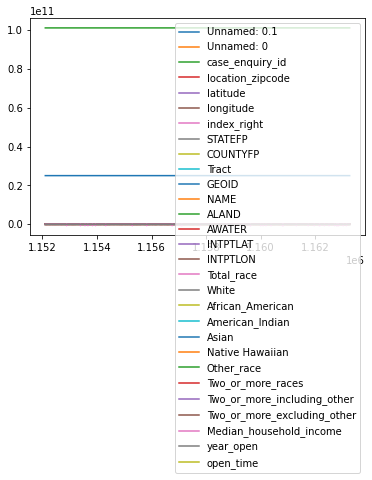

In [87]:
#not working 
#df.dropna(subset = ['EPS'])
#df_7_2 = df_7[df_7['open_time'].notna()]
#df_7_2 = df_7[df_7['Tract'].notna()]
#df_7_2.plot(column='open_time')
#world.plot(column='gdp_per_cap');
#px.choropleth(df_7_2, 
#              locations = 'Tract',
#              color="open_time", 
#              animation_frame="year_open",
#              range_color=(0, 20),
#              title='Open Time by Census Tract',
#              height=600
#             )